In [2]:
import pandas as pd

In [7]:
data = pd.read_csv('dataset_framingham.csv')
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

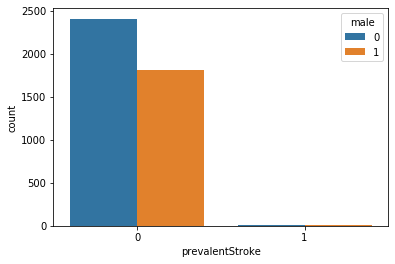

In [9]:
sns.countplot(x='prevalentStroke', hue='male', data=data)

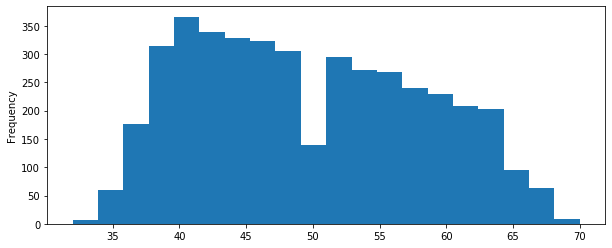

In [13]:
data['age'].plot.hist(bins=20, figsize=(10,4))

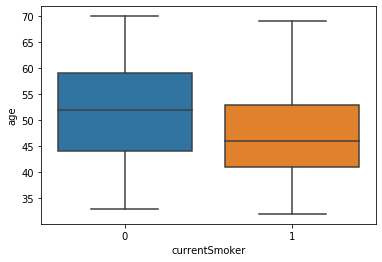

In [16]:
sns.boxplot(x='currentSmoker', y='age', data=data)

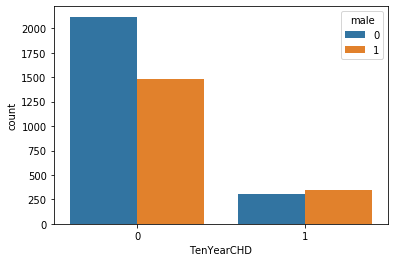

In [18]:
sns.countplot(x='TenYearCHD', hue='male', data=data)

In [20]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
data.drop(['education', 'totChol'], axis=1, inplace=True)

In [24]:
replacing_zeros = ['cigsPerDay','BPMeds','BMI','heartRate','glucose']

for col in replacing_zeros:
    data[col] = data[col].replace(0, np.nan)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.nan, mean)

In [26]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [30]:
x = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [36]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred = reg.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[897,   2],
       [153,   8]], dtype=int64)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8537735849056604

In [45]:
precision = precision_score(y_test, y_pred)
precision

0.8